# K-means in Python

This notebook will walk you through implementing the k-means algorithm using the `scikit` learn framework.

Start by importing the `pandas`, `numpy`, `seaborn`, and `matplotlib` libraries as before, and then also import the necessary functions from the `sklean` library.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Let's load up the same penguin data, but this time we'll remove any categorical variables from the data set so we can see how well the k-means algorithm can cluster our data without knowing the species information.

In [2]:
# Load the data
penguins = pd.read_csv('penguins_unlabeled.csv')

Next, we'll clean up the data a bit by removing rows with missing values, and only select the columns that deal with length and mass measurements.

In [4]:
# Preprocess the data
penguins = penguins.dropna()  # Remove rows with missing values

# Select features for clustering
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

Then, these columns need to be scaled so that they're all on a similar scale. `sklean` comes with a standard scaler which will convert value in a column to its corresponding z-score.

In [6]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

In [7]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++')
penguins['cluster'] = kmeans.fit_predict(X_scaled)
penguins

C:\Users\e202172129\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,cluster
0,1,39.1,18.7,181.0,3750.0,2007,1
1,2,39.5,17.4,186.0,3800.0,2007,1
2,3,40.3,18.0,195.0,3250.0,2007,1
4,5,36.7,19.3,193.0,3450.0,2007,1
5,6,39.3,20.6,190.0,3650.0,2007,1
...,...,...,...,...,...,...,...
339,340,55.8,19.8,207.0,4000.0,2009,1
340,341,43.5,18.1,202.0,3400.0,2009,1
341,342,49.6,18.2,193.0,3775.0,2009,1
342,343,50.8,19.0,210.0,4100.0,2009,1


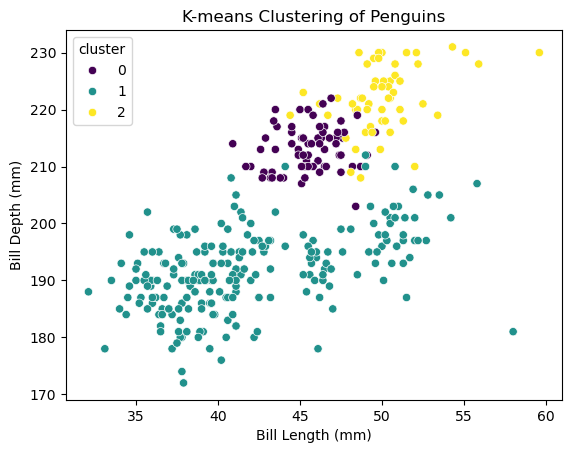

In [8]:
# Visualize the results (using the first two features)
sns.scatterplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='cluster', palette="viridis")

# Add labels
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('K-means Clustering of Penguins')
plt.show()

In [9]:
# Print cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       45.566667      14.371014         213.275362  4716.304348
1       41.863303      18.358716         191.692661  3705.733945
2       50.018182      15.852727         221.963636  5522.272727


In [20]:
# Print the number of data points in each cluster
print("Cluster Sizes:")
print(penguins['cluster'].value_counts().sort_index())

Cluster Sizes:
cluster
0     69
1    218
2     55
Name: count, dtype: int64


## Assignment
